In [1]:
import warnings
warnings.filterwarnings('ignore') # warning을 무시하기

# 문제정의
- 버섯의 특징을 활용해서 식욕/독성 버섯으로 분류해보자

# 데이터수집

In [2]:
# 데이터 가져오기
import pandas as pd 
data = pd.read_csv('./Data/mushroom.csv')

data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# 데이터 갯수 확인
# 행(8124) 열(특성 22개, 정답 1개)
data.shape

(8124, 23)

# 데이터전처리

In [4]:
# 결측치
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# 이상치 
data.describe()
# describe() : 숫자인 컬럼에서만 의미가 있음
# 문자열로 이루어진 컬럼
# unique : 컬럼을 구성하고 있는 문자의 가지수 
# top : 어떤 데이터가 가장 많은지
# freq : top의 빈도수 



,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 탐색적 데이터 분석
- 일단 생략 : 데이터에 수치형 데이터가 없기 때문에 시각화하기가 어려움

# 모델 선택 및 하이퍼파리미터 튜닝

## 모델 불러오기


In [6]:
# DecisionTree 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

## 데이터 나누기 

### 문제와 정답데이터로 나누기

In [7]:
data 
# 문제
X = data.loc[:, "cap-shape":]
# 정답 
y = data["poisonous"]
X


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


### 문제를 숫자로 만들기


In [8]:
X1 = X.copy() # 데이터 복사 : 다른 주소로 X, X1은 전혀 별개의데이터/ X1의 값이 바뀌어ㅓ도 X에는 반영 안됨 
X1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


#### Label 인코딩
- 하나의 값에 하나의 숫자를 대입 
- 많이 사용되는 방법은 아닝
    - 왜? 값을 변경하는 있어서 사용의 개입이 들어감
    - 원래 문자가 가지고 있던 의미는 사라지고 사용자가 의미대로 값을 바꿔버럼

In [9]:
X1['cap-shape'].unique()
# 총 6개의 값을 값이 가지고 있는 순서대로 번호(1~6)를 문자값에 매칭되는 수치형 데이터로 변경
#'x': 1 'b': 2 's': 3 'f': 4 'k': 5 'c' : 6
# --> 파이썬의 인덱스 개념을 적용해서 0~5변경 

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [10]:
# Label 인코딩 : map함수 
# map() 를 적용하기 위해 딕셔너리 형태로 값을 저장 

trans = {'x' : 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c' : 5}

# Key값을 value 값으로 변경 
X1['cap-shape'] = X1['cap-shape'].map(trans)

# map() 함수를 쓸떄 주의할 점 : 가지고 있는 대상을 전부 바꿔줘야 함(일부만 변경하면 오류발생!!!!)

In [11]:
X1['cap-shape'].value_counts() # 값이 바뀐 것을 decribe() 수치와 비교 확인 

0    3656
3    3152
4     828
1     452
2      32
5       4
Name: cap-shape, dtype: int64

#### One-hot 인코딩
- 컬럼이 가지고 있는 데이터만큼 컬럼을 생성
- 0과 1로 데이터를 표시 
- 데이터가 늘어나는 효과를 얻음
- 일반적으로 라벨인코딩보다 더 많이 사용 

- Label : One-hot
    - Label : 기존에 가지고 있던 데이터의 의마가 사라짐
    - One-hot : 장점1. 기존에 가지고 있는 데이터의 의미 유지
    -           장점2. 데이터가 늘어나는 효과 - 가지수가 많아짐 
    ![KakaoTalk_Image_2023-08-24-12-27-23.png](attachment:KakaoTalk_Image_2023-08-24-12-27-23.png)

In [12]:
# One-hot 인코딩 진행하는 함수 : pd.get_dummies(대상)
X2 = X.copy()
X_onehot = pd.get_dummies(X2)
X_onehot # 숫자형 데이터가 담겨있음 

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## 훈련과 평가데이터로 나누기(train/test)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size= 0.3)

In [14]:
X_train.shape

(5686, 117)

# 학습

In [15]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

# 평가

In [16]:
# 보통 1.0 --> 과대적합
tree_model.score(X_train,y_train)

1.0

In [17]:
tree_model.score(X_test,y_test)

# 학습용, 평가용 모두 1.0
# 1. 뭔가 잘못됬다 : 99%
# 2. 지나치게 학습이 잘 됐다 : 1% -> 데이터가 구분하기 좋은 데이터로 구성이 되어있어서 학습이 잘 됐다. 

1.0

# 알고리즘 시각화 

In [22]:
# 시각화 패키지 설치하기
# graphviz.org/download/
!pip install graphviz
# conda install graphviz

In [35]:
# 1. 알고리즘 표현하기
# tree가 가지고 있는 알고리즘을 밖으로 내보겠다라는 의미 --> export

# tree_model = DecsionTreeClass
from sklearn.tree import export_graphviz
# 알고리즘으로 내보낼 모델 
export_graphviz(tree_model,
                
#               tree.dot 형태로 알고리즘을 내보낸다 (파일의 형태를 지정 )
                out_file = 'tree.dot',
                
                # 정답을 어떻게 표시할 것인지 
                # 한글도 지원이 되지만 마지막에 그림으로 저장했을 떄 한글이 깨지는 경우가 있어 영어로 명시권장
                class_names = ['p', 'e'],
                
                # 원래는 틍성의 번호를 표시하지만,
                # 특성의 이름을 지정해주면 지정한 특성의 이름으로 표시
                feature_names = X_onehot.columns,
                
                # 불순도로 기본값은 jini --> entropi 값을 사용할수 있음
                impurity = True,
                
#               클래스(정답)별로 색의 변화를 줄 것인지 설정 
                #연한색상 - 분류는 잘 안되어 있지만 같은 계열 색상으로 표시
                 filled = True
                )


In [33]:
# 2. 환경변수 설정 
# graphvizx를 파이썬에서 사용하기 위해서 폴더의 경로를 지정

import os
os.environ['PATH'] += os.pathsep + "/Users/sinhyeonjin/anaconda3/lib/python3.11/site-packages/sphinx/templates/graphviz "

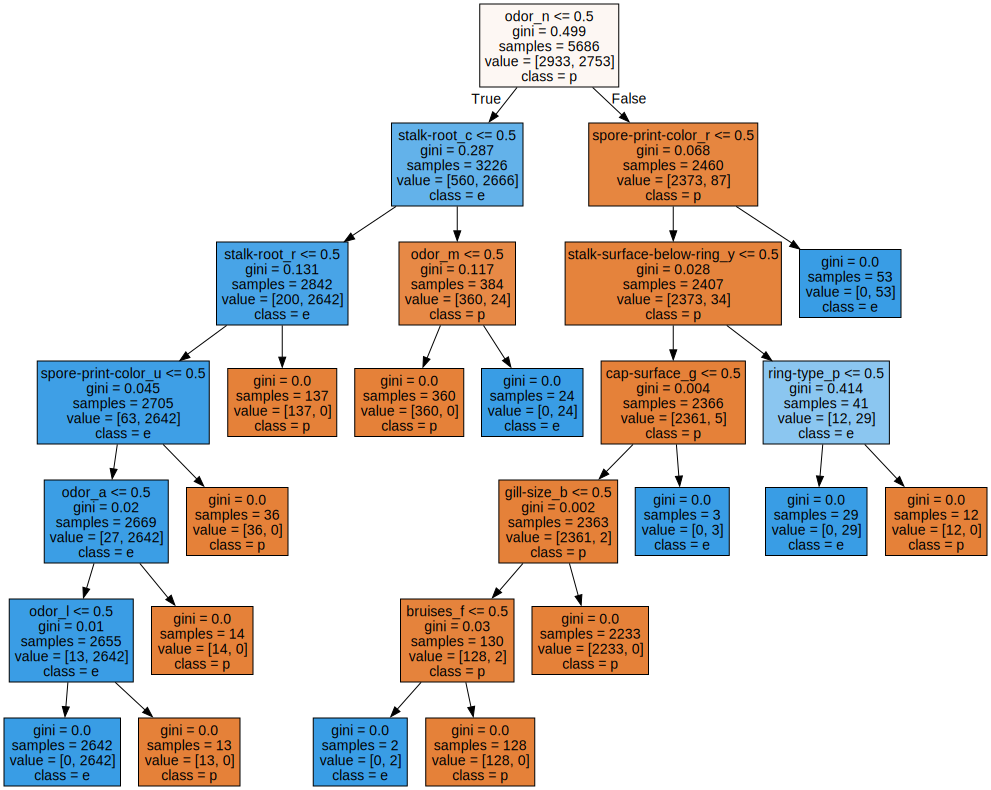

In [36]:
# 3. 알고리즘 
# 1단계에서 글로 표현된 알고리즘을 그림으로 표현하기
import graphviz

with open('tree.dot', encoding="UTF8") as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [42]:
# 4. 3단계에서 그린 그림을 파일 형태(png, jpg ...)로 저장하기
from subprocess import check_call
# check_call 이 정상적으로 실행되면 0으로 출력 
check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

0

# 교차검증
- 훈련과 평가를 여러번 진행하면서 검증의 효과를 얻기 위한 방법
- 전체 데이터가 축소되지 않기 때문에 적은 데이터에서도 효과를 얻을 수 있음 

- 앞으로는 7.평가 단계에서 교차검증 수행하기
    - 어떻게? 평가단계에서 score() 대신 -> cross_val_score(tree_model, X_onehot, y, cv=5).mean() 로 확인한다 



In [54]:
# 교차검증 라이브러리 꺼내오기
from sklearn.model_selection import cross_val_score

cross_val_score(tree_model, X_onehot, y, cv=5)

array([1.        , 1.        , 0.99630769, 1.        , 0.72413793])

In [76]:
# mean() 함수를 이용 
cross_val_score(tree_model, X_onehot, y, cv=5).mean()
# 기존 평가에서는 완벽한 1이 나왔지만 
# 교차검증을 해보니 0.94 정도가 나왔다고 확인할수 있음 

0.9431039029935582

## 특성 선택
- 데이터가 엄청 많아지게 되면 데이터를 줄일 필요가 있음.
    1. 학습량이 늘어나서 시간이 많이 소요됨 (성능저하)
    2. 쓸모없는 데이터가 발생 (규칙을 찾는데 도움이 안되는 데이터)
    

In [77]:
tree_model

DecisionTreeClassifier()

In [93]:
fi = tree_model.feature_importances_

# 117개에 대한 중요도를 표시
# 0 ~ 1 사이의 값으로 표시
# 전체 117개의 중요도 합이 1--> 총홥이 1
# 1에 가까울 수록 중요한 특성 


In [94]:
X_onehot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
# 특성의 중요도를 확인하기 위해 데이터프레임의 형태로 변환
df = pd.DataFrame(fi, index=X_onehot.columns)
df

# 가장 많이 사용된 특성들만 확인해보기
# 0이라는 이름의 컬럼을 기준으로 내림차순 정렬로 값 확인 
df.sort_values(by = 0, ascending=False)

,0
odor_n,0.615011
stalk-root_c,0.179120
stalk-root_r,0.087596
spore-print-color_r,0.035493
spore-print-color_u,0.024510
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


In [104]:
# 사용된 특성(중요도가 0이 아닌 특성들)만 보고싶다 -> 불리언인덱싱
df[df[0] != 0]
# 실제 버섯의 특성/시용 분류에 사용된 특성은 13개 



,0
cap-surface_g,0.002106
bruises_f,0.001387
odor_a,0.009711
odor_l,0.009110
odor_m,0.015844
odor_n,0.615011
gill-size_b,0.000020
stalk-root_c,0.179120
stalk-root_r,0.087596
stalk-surface-below-ring_y,0.014114
